C:\Users\NIDHI RAGHUWANSHI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


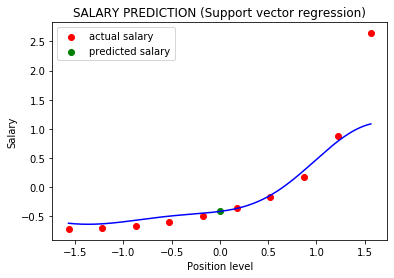

[131106.77303274]


In [1]:
# SVR

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

# Predicting a new result
x1=sc_X.fit_transform([[6.5]])
y1 = regressor.predict(x1)
y_pred = sc_y.inverse_transform(y1)


# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red',label=('actual salary'))
plt.legend()
plt.scatter(x1, y1, color = 'green',label=('predicted salary'))
plt.legend()
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SALARY PREDICTION (Support vector regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
print(y_pred)